In [1]:
import pandas as pd
import warnings
import h5py 
import glob
import os
import numpy as np
import ast

### graphic libraries
import matplotlib.pyplot as plt
import seaborn as sns

import chromoscores.maputils as chrmap
import chromoscores.scorefunctions as chrsco
import chromoscores.snipping as chrsn
import cooler
from scipy.ndimage import gaussian_filter1d
from scipy import ndimage

### making dictionary of simulations

In [2]:
path_dict = {}

directory ='/home1/rahmanin/start/polychrom/projects/Dynamic_boundary_elements/analysis/maps/maps_points_cools_eq_l/'

for name  in glob.glob(directory+'folder_*'):
    path_dict[name.split('eq_l/')[1][:].split('.mcool')[0]]= name
path_dict = dict(sorted(path_dict.items()))
print(len(path_dict))

31


In [3]:
def smooth(x, sigma = 1.5):
        return gaussian_filter1d(x, sigma)

### all orientation

30.0 seconds


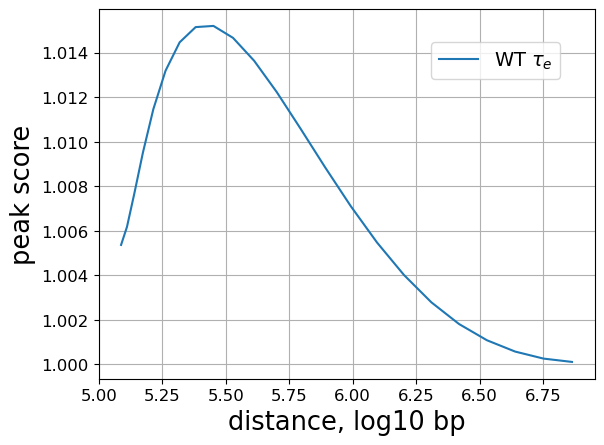

150.0 seconds
150.0 seconds


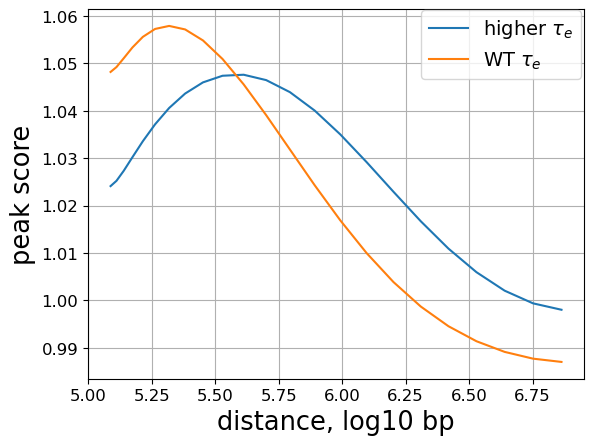

300.0 seconds
300.0 seconds
300.0 seconds


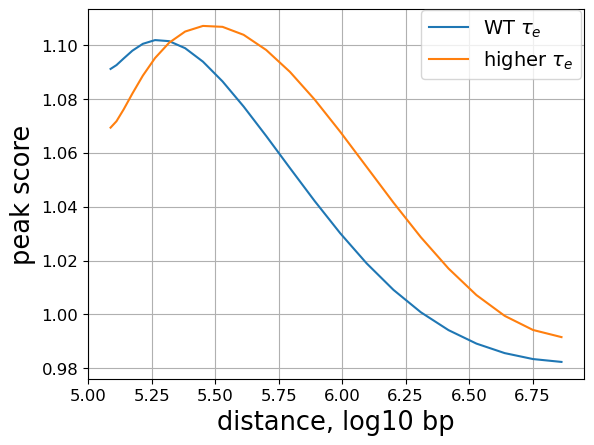

300.0 seconds
300.0 seconds
300.0 seconds


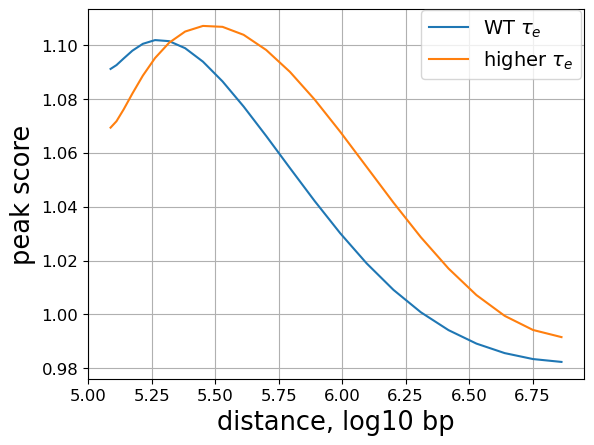

600.0 seconds
600.0 seconds


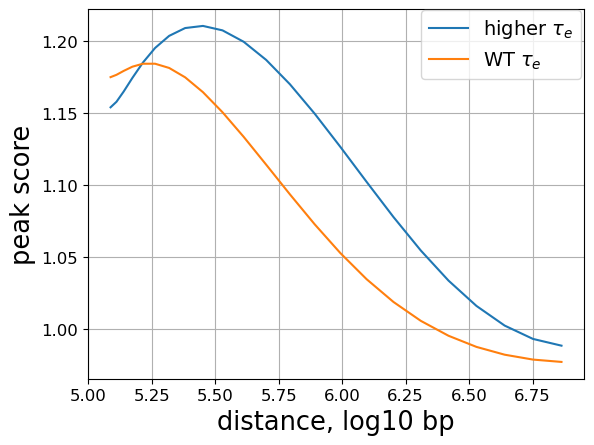

900.0 seconds
900.0 seconds
900.0 seconds


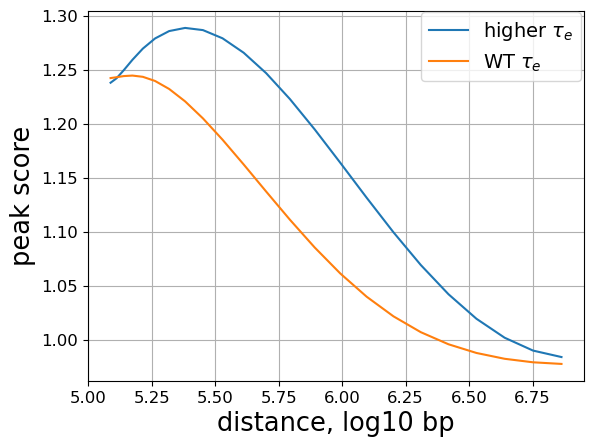

1500.0 seconds
1500.0 seconds
1500.0 seconds
1500.1 seconds


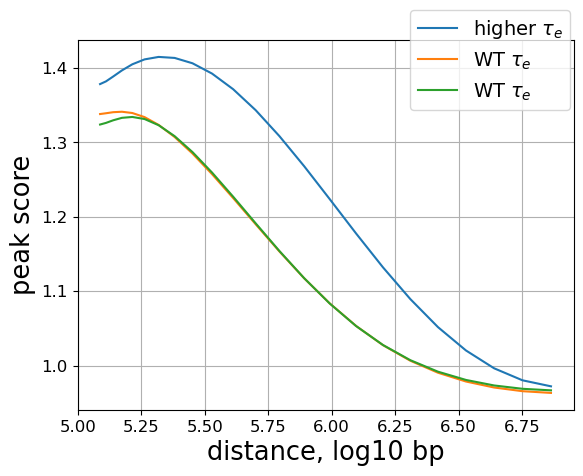

1500.0 seconds
1500.0 seconds
1500.0 seconds
1500.1 seconds


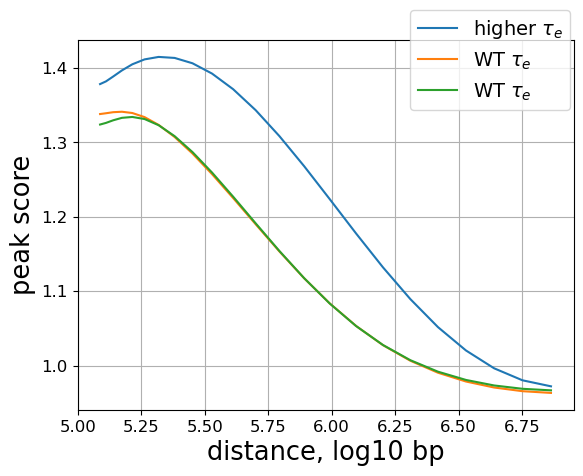

2235.0 seconds
2235.0 seconds


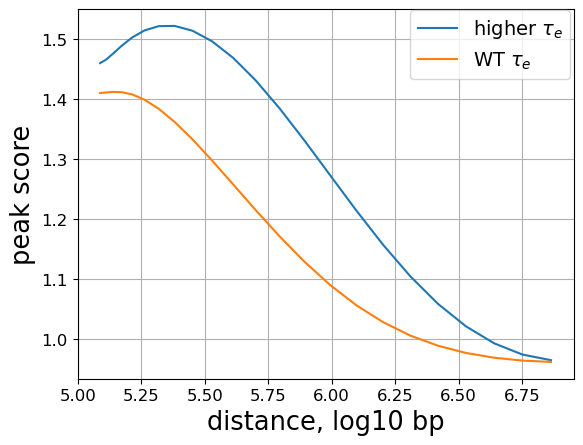

3000.0 seconds
3000.0 seconds
3000.0 seconds


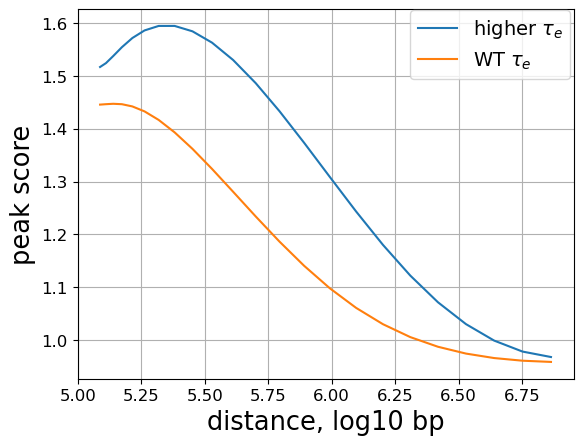

6000.0 seconds
6000.0 seconds
6000.0 seconds


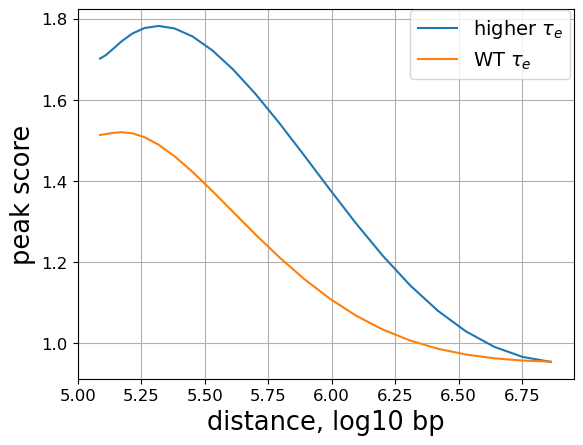

30000.0 seconds
30000.0 seconds
30000.0 seconds


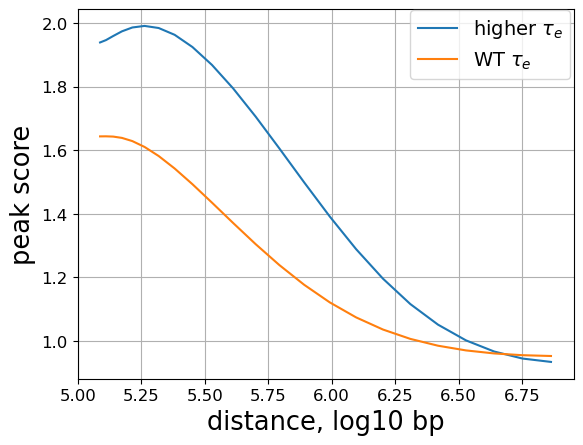

In [6]:
clife_range = [ 11.43, 57.14, 114.29, 114.3, 228.571, 342.86, 571.43, 571.45, 851.43, 1142.86,2285.71, 11428.57]

i = 1
sns.reset_defaults()
convertor = 21.875*60/500 #to convert from lattice based scales to seconds

for clife_val in clife_range:
    i+=1
    for name in list(path_dict.keys()):
        params=[ast.literal_eval(i) for i in name.split('folder_')[1].split('_')[1::2]]
        face, back, clife, cof, life, slife, birth, pause, sep, site, mon, rep, step, vel = params
        if np.round(clife,1)==np.round(clife_val,1):
            print(np.round(clife*convertor,1),'seconds')
            
            if life == 1500 and vel ==1 and np.round((clife/(clife+cof)),2)==0.7:
                f=pd.read_csv('../../../data/peakscore_with_orientation/peakscore_%s_hsteps_orientation_cool_res_10_points_eq_l.csv' % name)
                f = f[f['orientation']=='all']
                chr_dist = f['chr_distance']
                peak_score = f['peak_score']
                pixel_sta = 1
                plt.plot(np.log10(chr_dist[pixel_sta:]*1000), smooth(peak_score[pixel_sta:], 3.95),label=r'higher $\tau_e$')
                
            if life == 500 and vel ==1 and np.round((clife/(clife+cof)),2)==0.7:
                f=pd.read_csv('../../../data/peakscore_with_orientation/peakscore_%s_hsteps_orientation_cool_res_10_points_eq_l.csv' % name)
                f = f[f['orientation']=='all']
                chr_dist = f['chr_distance']
                peak_score = f['peak_score']
                pixel_sta = 1
                plt.plot(np.log10(chr_dist[pixel_sta:]*1000), smooth(peak_score[pixel_sta:], 3.95),label=r'WT $\tau_e$')

    #plt.xlim(4.3, 6.71)
    plt.grid(True)
    #plt.ylim(0.95,1.91)
    plt.ylabel('peak score',fontsize = 18.5)
    plt.xlabel('distance, log10 bp', fontsize = 18.5)
    plt.legend(loc=(0.671,0.81), fontsize = 14)
    plt.xticks(fontsize=11.95)
    plt.yticks(fontsize=11.95)
    plt.savefig('figs/peak_and_distance_clife_%s_all.pdf'%clife_val,bbox_inches = 'tight',transparent=True)
    plt.show()

convergent -+

30.0 seconds


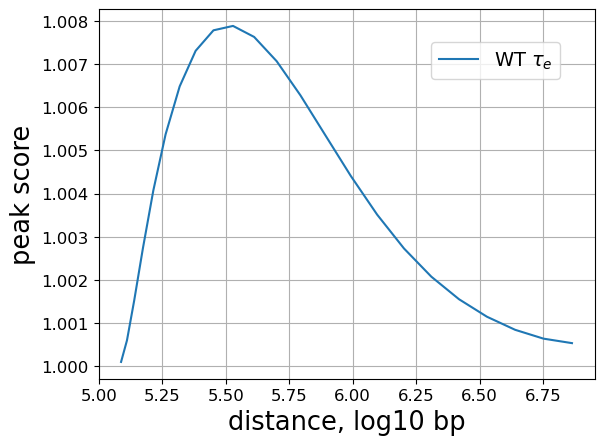

150.0 seconds
150.0 seconds


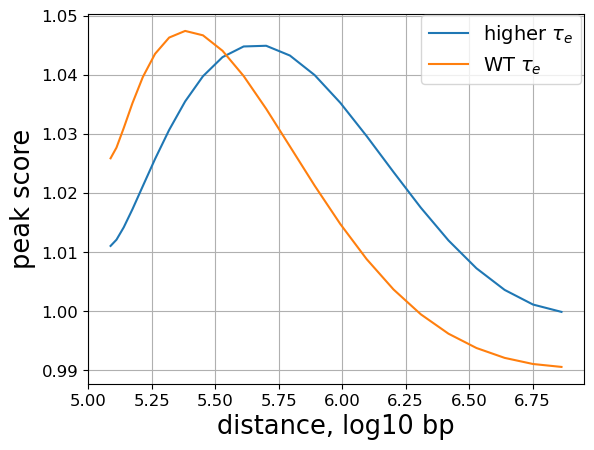

300.0 seconds
300.0 seconds
300.0 seconds


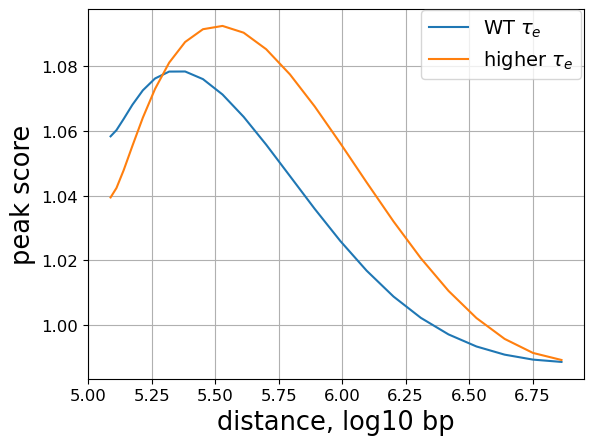

300.0 seconds
300.0 seconds
300.0 seconds


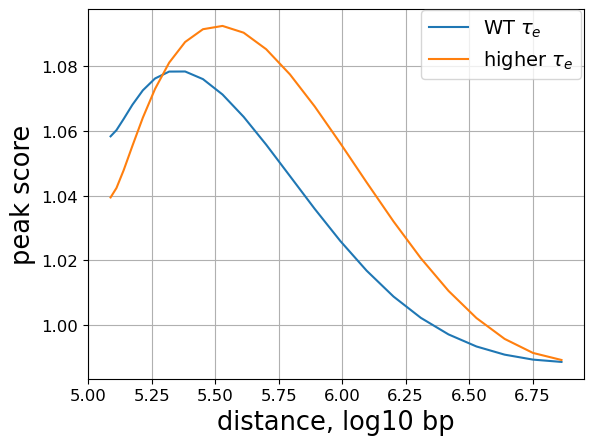

600.0 seconds
600.0 seconds


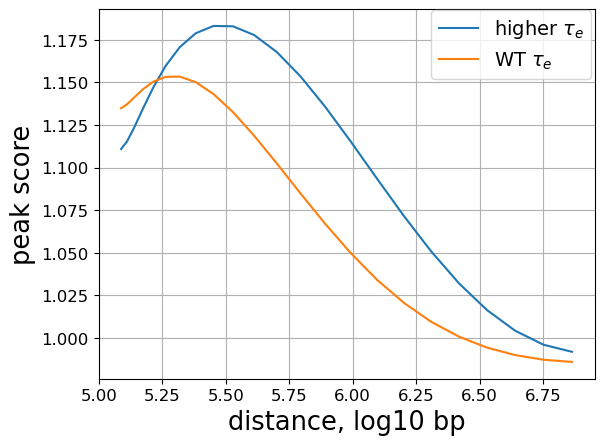

900.0 seconds
900.0 seconds
900.0 seconds


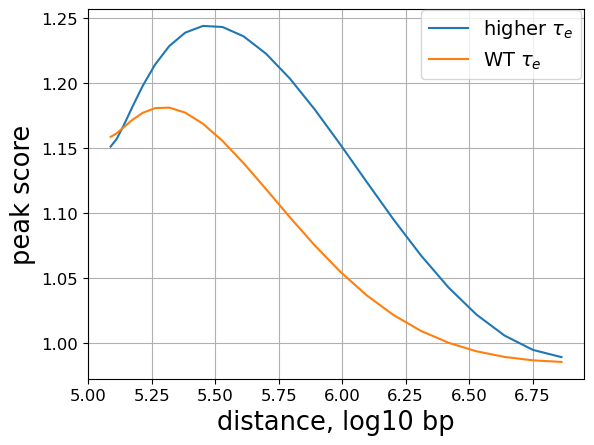

1500.0 seconds
1500.0 seconds
1500.0 seconds
1500.1 seconds


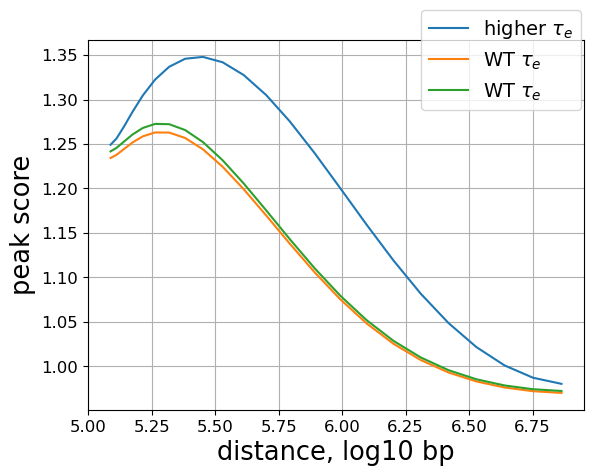

1500.0 seconds
1500.0 seconds
1500.0 seconds
1500.1 seconds


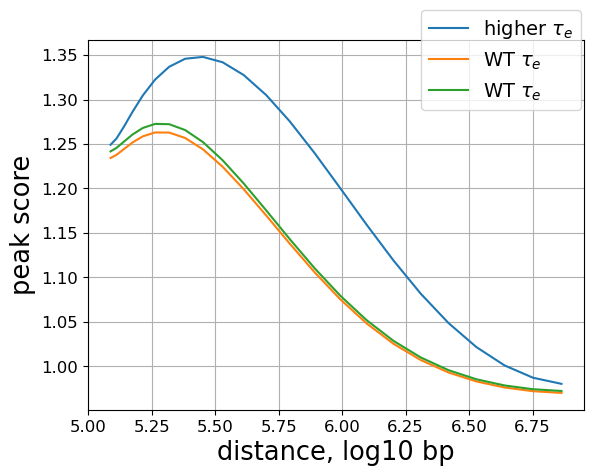

2235.0 seconds
2235.0 seconds


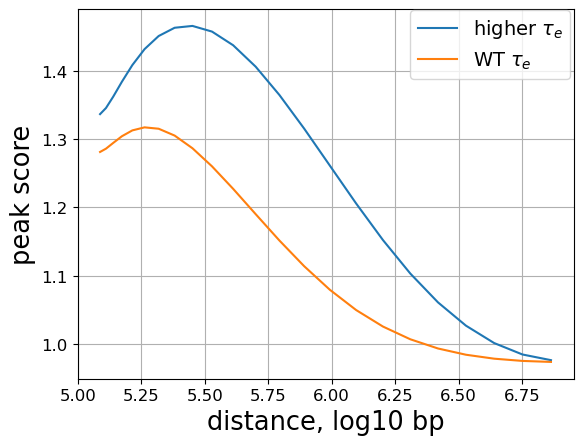

3000.0 seconds
3000.0 seconds
3000.0 seconds


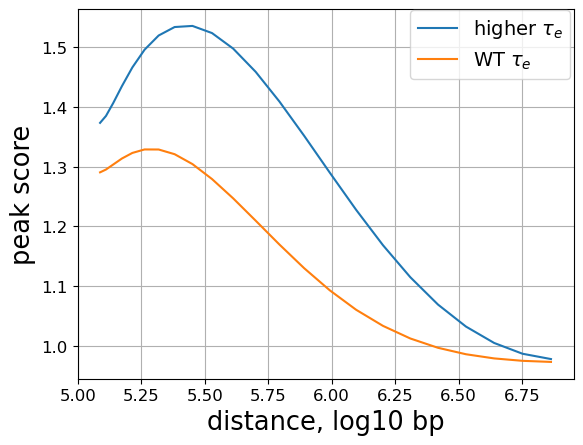

6000.0 seconds
6000.0 seconds
6000.0 seconds


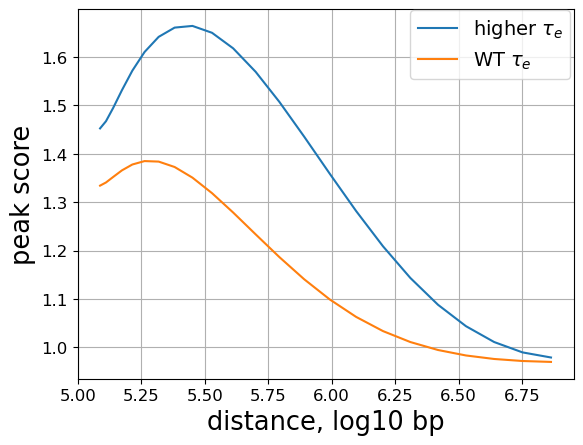

30000.0 seconds
30000.0 seconds
30000.0 seconds


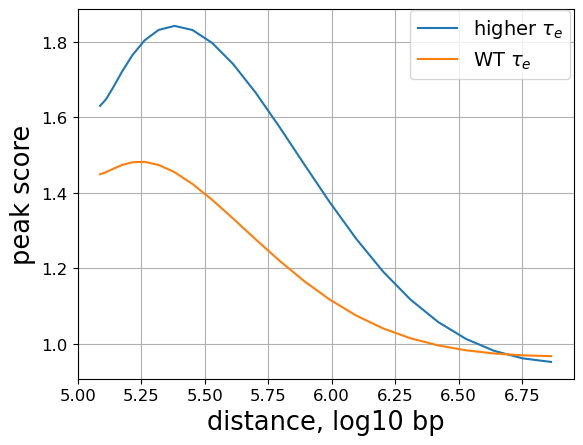

In [7]:
clife_range = [ 11.43, 57.14, 114.29, 114.3, 228.571, 342.86, 571.43, 571.45, 851.43, 1142.86,2285.71, 11428.57]

i = 1
sns.reset_defaults()
convertor = 21.875*60/500 #to convert from lattice based scales to seconds

for clife_val in clife_range:
    i+=1
    for name in list(path_dict.keys()):
        params=[ast.literal_eval(i) for i in name.split('folder_')[1].split('_')[1::2]]
        face, back, clife, cof, life, slife, birth, pause, sep, site, mon, rep, step, vel = params
        if np.round(clife,1)==np.round(clife_val,1):
            print(np.round(clife*convertor,1),'seconds')
            
            if life == 1500 and vel ==1 and np.round((clife/(clife+cof)),2)==0.7:
                f=pd.read_csv('../../../data/peakscore_with_orientation/peakscore_%s_hsteps_orientation_cool_res_10_points_eq_l.csv' % name)
                f = f[f['orientation']=='-+']
                chr_dist = f['chr_distance']
                peak_score = f['peak_score']
                pixel_sta = 1
                plt.plot(np.log10(chr_dist[pixel_sta:]*1000), smooth(peak_score[pixel_sta:], 3.95),label=r'higher $\tau_e$')
                
            if life == 500 and vel ==1 and np.round((clife/(clife+cof)),2)==0.7:
                f=pd.read_csv('../../../data/peakscore_with_orientation/peakscore_%s_hsteps_orientation_cool_res_10_points_eq_l.csv' % name)
                f = f[f['orientation']=='-+']
                chr_dist = f['chr_distance']
                peak_score = f['peak_score']
                pixel_sta = 1
                plt.plot(np.log10(chr_dist[pixel_sta:]*1000), smooth(peak_score[pixel_sta:], 3.95),label=r'WT $\tau_e$')

    #plt.xlim(4.3, 6.71)
    plt.grid(True)
    #plt.ylim(0.95,1.91)
    plt.ylabel('peak score',fontsize = 18.5)
    plt.xlabel('distance, log10 bp', fontsize = 18.5)
    plt.legend(loc=(0.671,0.81), fontsize = 14)
    plt.xticks(fontsize=11.95)
    plt.yticks(fontsize=11.95)
    plt.savefig('figs/peak_and_distance_clife_%s_conv.pdf'%clife_val,bbox_inches = 'tight',transparent=True)
    plt.show()

divergent +-

30.0 seconds


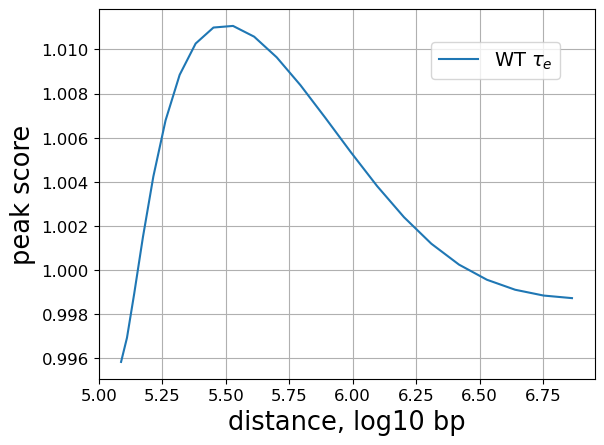

150.0 seconds
150.0 seconds


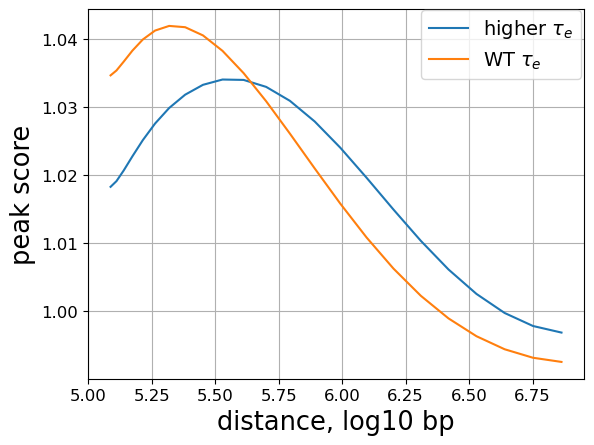

300.0 seconds
300.0 seconds
300.0 seconds


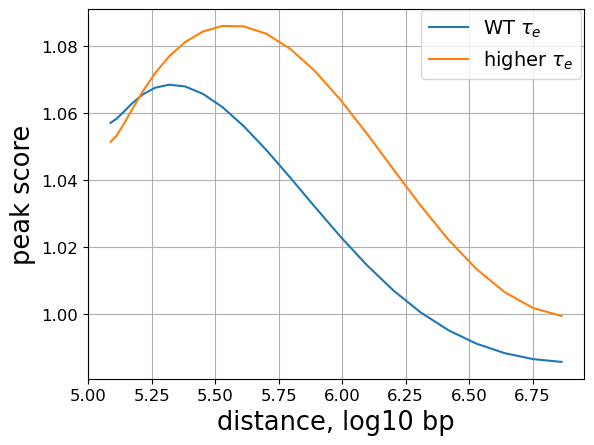

300.0 seconds
300.0 seconds
300.0 seconds


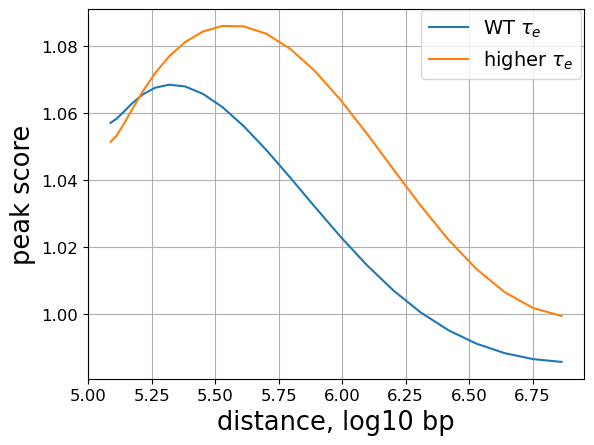

600.0 seconds
600.0 seconds


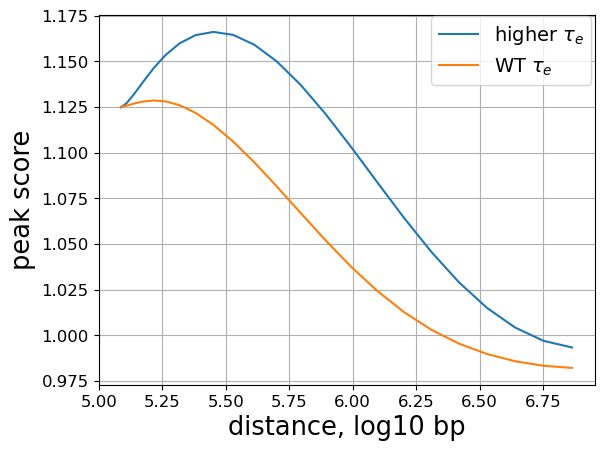

900.0 seconds
900.0 seconds
900.0 seconds


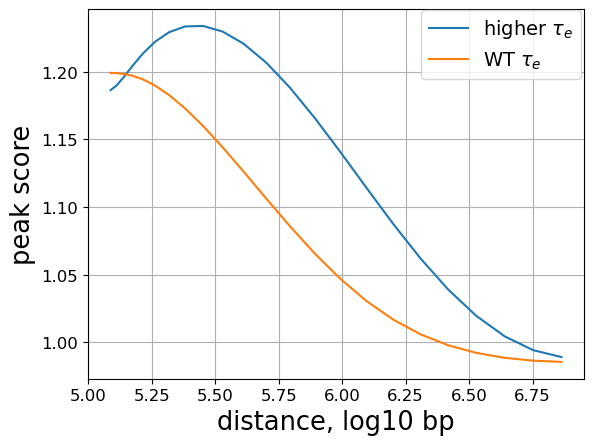

1500.0 seconds
1500.0 seconds
1500.0 seconds
1500.1 seconds


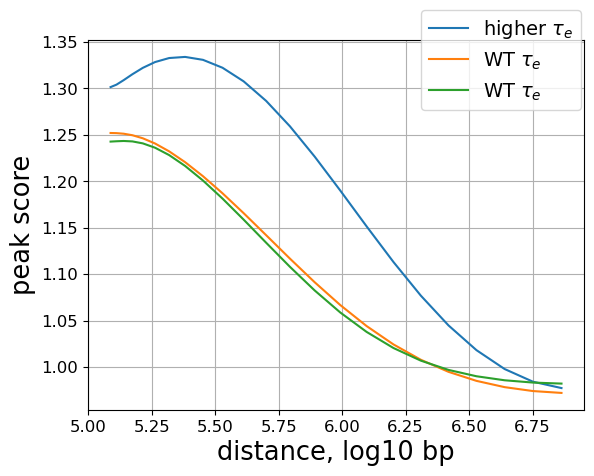

1500.0 seconds
1500.0 seconds
1500.0 seconds
1500.1 seconds


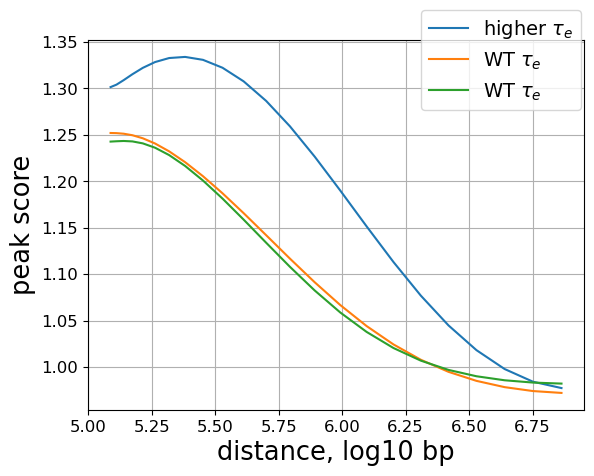

2235.0 seconds
2235.0 seconds


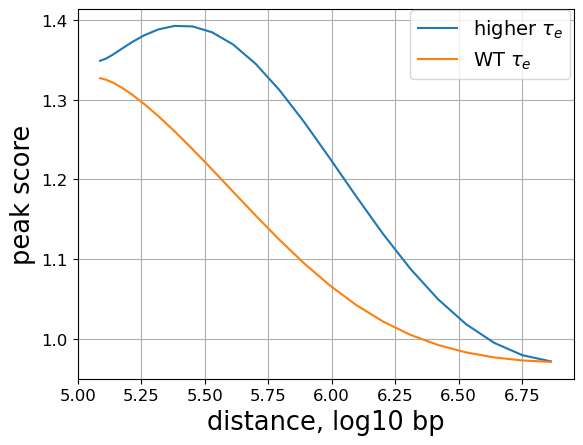

3000.0 seconds
3000.0 seconds
3000.0 seconds


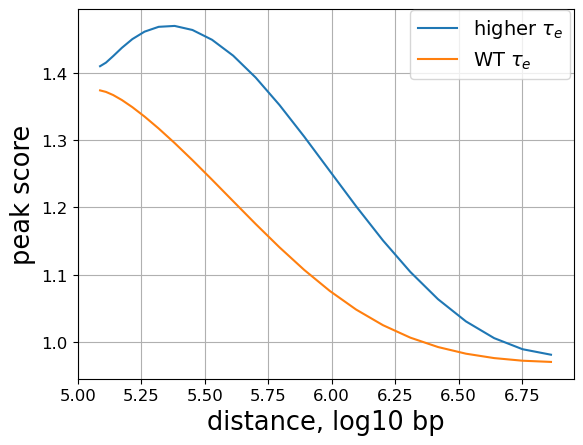

6000.0 seconds
6000.0 seconds
6000.0 seconds


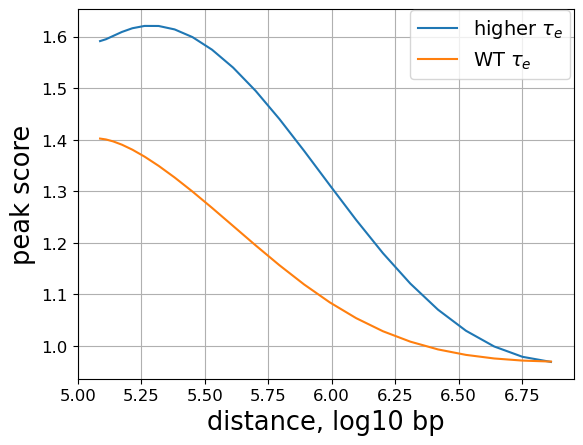

30000.0 seconds
30000.0 seconds
30000.0 seconds


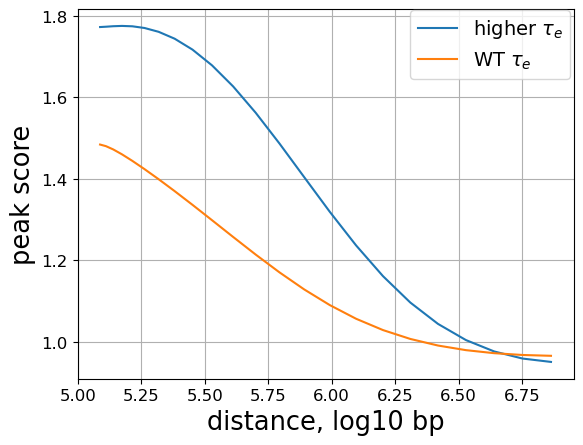

In [8]:
clife_range = [ 11.43, 57.14, 114.29, 114.3, 228.571, 342.86, 571.43, 571.45, 851.43, 1142.86,2285.71, 11428.57]

i = 1
sns.reset_defaults()
convertor = 21.875*60/500 #to convert from lattice based scales to seconds

for clife_val in clife_range:
    i+=1
    for name in list(path_dict.keys()):
        params=[ast.literal_eval(i) for i in name.split('folder_')[1].split('_')[1::2]]
        face, back, clife, cof, life, slife, birth, pause, sep, site, mon, rep, step, vel = params
        if np.round(clife,1)==np.round(clife_val,1):
            print(np.round(clife*convertor,1),'seconds')
            
            if life == 1500 and vel ==1 and np.round((clife/(clife+cof)),2)==0.7:
                f=pd.read_csv('../../../data/peakscore_with_orientation/peakscore_%s_hsteps_orientation_cool_res_10_points_eq_l.csv' % name)
                f = f[f['orientation']=='+-']
                chr_dist = f['chr_distance']
                peak_score = f['peak_score']
                pixel_sta = 1
                plt.plot(np.log10(chr_dist[pixel_sta:]*1000), smooth(peak_score[pixel_sta:], 3.95),label=r'higher $\tau_e$')
                
            if life == 500 and vel ==1 and np.round((clife/(clife+cof)),2)==0.7:
                f=pd.read_csv('../../../data/peakscore_with_orientation/peakscore_%s_hsteps_orientation_cool_res_10_points_eq_l.csv' % name)
                f = f[f['orientation']=='+-']
                chr_dist = f['chr_distance']
                peak_score = f['peak_score']
                pixel_sta = 1
                plt.plot(np.log10(chr_dist[pixel_sta:]*1000), smooth(peak_score[pixel_sta:], 3.95),label=r'WT $\tau_e$')

    #plt.xlim(4.3, 6.71)
    plt.grid(True)
    #plt.ylim(0.95,1.91)
    plt.ylabel('peak score',fontsize = 18.5)
    plt.xlabel('distance, log10 bp', fontsize = 18.5)
    plt.legend(loc=(0.671,0.81), fontsize = 14)
    plt.xticks(fontsize=11.95)
    plt.yticks(fontsize=11.95)
    plt.savefig('figs/peak_and_distance_clife_%s_dive.pdf'%clife_val,bbox_inches = 'tight',transparent=True)
    plt.show()

### binding time vs occupancy for orientation

In [9]:
path_dict = {}

directory = '/home1/rahmanin/start/polychrom/projects/Dynamic_boundary_elements/analysis/maps/maps_points_cools_eq/'

for name  in glob.glob(directory+'folder_*'):
    path_dict[name.split('_eq/')[1][:].split('.mcool')[0]]= name
path_dict = dict(sorted(path_dict.items()))
print(len(path_dict))

499


In [10]:
file = open('../../../data/peak_score_averaged_hsteps_coolres10_points_eq_c_1.5.csv','w')

file.write('life,velocity,clife,cof,peak_ave\n')


for name in list(path_dict.keys()):
    params=[ast.literal_eval(i) for i in name.split('folder_')[1].split('_')[1::2]]
    face, back, clife, cof, life, slife, birth, pause, sep, site, mon, rep, step, vel = params
    if step==400.0: continue
    f =pd.read_csv('../../../data/peakscore/peakscore_%s_hsteps_cool_res10_points_eq_n.csv' % name)
    f = f[f['chr_distance']<=7500]
    chr_dist = f['chr_distance']
    peak_score = f['peak_score']
    peak_ave = np.mean(peak_score[:])
    
    f_new=f
    n_tot = f_new['n'].sum()
    f_new ['score_mult_n'] = (f_new['peak_score']*f_new['n'])
    data_mean_weight = (f_new['score_mult_n'].sum())/n_tot
    file.write('%s,%s,%s,%s,%s\n'%(life, vel, clife,cof, data_mean_weight))
    
file.close()


In [11]:
file = pd.read_csv('../../../data/peak_score_averaged_hsteps_coolres10_points_eq_c_1.5.csv')
file

,life,velocity,clife,cof,peak_ave
0,1500.0,1,11.43,1.27,1.002194
1,2500.0,1,11.43,1.27,1.001907
2,3500.0,1,11.43,1.27,1.014783
3,4500.0,1,11.43,1.27,1.017220
4,500.0,1,11.43,1.27,1.001767
...,...,...,...,...,...
494,2500.0,1,571.43,97.96,1.147209
495,3500.0,1,571.43,97.96,1.171317
496,4500.0,1,571.43,97.96,1.199781
497,500.0,1,571.43,97.96,1.024747


In [12]:
lifetime = file['life']
velocity = file['velocity']
clife = file['clife']
cof = file['cof']
file['occupancy']=(file['clife']/(file['clife']+file['cof'])).round(2)
unique_life = np.unique(lifetime)
unique_vel = np.unique(velocity)
unique_clife = np.unique(clife)
unique_cof = np.unique(cof)
unique_occupancy = np.unique(file['occupancy'])
file

,life,velocity,clife,cof,peak_ave,occupancy
0,1500.0,1,11.43,1.27,1.002194,0.90
1,2500.0,1,11.43,1.27,1.001907,0.90
2,3500.0,1,11.43,1.27,1.014783,0.90
3,4500.0,1,11.43,1.27,1.017220,0.90
4,500.0,1,11.43,1.27,1.001767,0.90
...,...,...,...,...,...,...
494,2500.0,1,571.43,97.96,1.147209,0.85
495,3500.0,1,571.43,97.96,1.171317,0.85
496,4500.0,1,571.43,97.96,1.199781,0.85
497,500.0,1,571.43,97.96,1.024747,0.85


In [13]:
file['clife']=file['clife']
file['cof']=file['cof']
lifetime = file['life']
velocity = file['velocity']
clife = file['clife']
cof = file['cof']
occupancy = file['occupancy']


unique_life = np.unique(lifetime)
unique_vel = np.unique(velocity)
unique_clife = np.unique(clife)
unique_cof = np.unique(cof)
unique_occup = np.unique(occupancy)
file

,life,velocity,clife,cof,peak_ave,occupancy
0,1500.0,1,11.43,1.27,1.002194,0.90
1,2500.0,1,11.43,1.27,1.001907,0.90
2,3500.0,1,11.43,1.27,1.014783,0.90
3,4500.0,1,11.43,1.27,1.017220,0.90
4,500.0,1,11.43,1.27,1.001767,0.90
...,...,...,...,...,...,...
494,2500.0,1,571.43,97.96,1.147209,0.85
495,3500.0,1,571.43,97.96,1.171317,0.85
496,4500.0,1,571.43,97.96,1.199781,0.85
497,500.0,1,571.43,97.96,1.024747,0.85


### heatmaps for all orientations

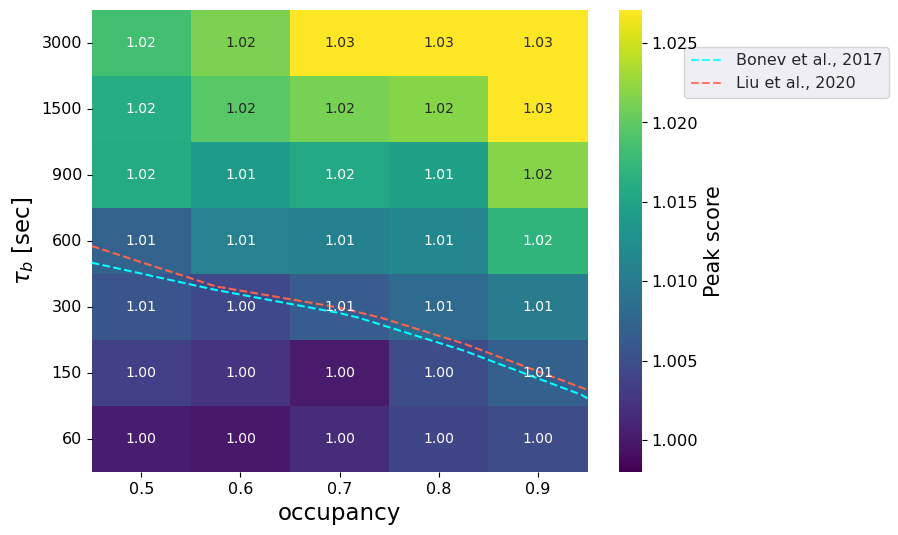

In [14]:
list_life, list_vel = [500], [1]

numline_c = 7
numline_o = 5
occupancy_range = [0.5, 0.6, 0.7, 0.8, 0.9]
file = file[file['occupancy'].isin(occupancy_range)]
lifetime = file['life']
velocity = file['velocity']

for life in list(list_life):
    for vel in list(list_vel):
        new_file_filtered_unique = file[(lifetime == life) & (velocity == vel)][['clife', 'occupancy', 'peak_ave']]
        
        # Group by 'clife' and 'occupancy_bin', and calculate the mean of 'isoscore'
        dtaframe_grouped = new_file_filtered_unique.groupby(['clife', 'occupancy'], as_index=False).mean()
        convertor = 21.875 * 60 / 500
        dtaframe_grouped['clife'] = (dtaframe_grouped['clife'] * convertor).round()
        #dtaframe_grouped['peak_ave'] = dtaframe_grouped['peak_ave'].round(3)
        dtaframe_grouped = dtaframe_grouped.drop_duplicates(keep='first')
        dtaframe_grouped = dtaframe_grouped[dtaframe_grouped['clife'] > 30]
        dtaframe_grouped = dtaframe_grouped[dtaframe_grouped['clife'] <= 3000]
        heatmap_data = dtaframe_grouped.pivot('clife', 'occupancy', 'peak_ave')
        
        plt.figure(figsize=(8, 6))
        im = sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".2f", vmin=0.998, vmax=1.0271, cbar_kws={'label': 'Frip score'})
        sns.set(font_scale=0.831)
        cbar = im.collections[0].colorbar
        cbar.ax.tick_params(labelsize=11.75)
        cbar.set_label('Peak score', fontsize=15)
        
        # Add equipotential lines for loop size = 700
        smooth_scale = 1
        z = ndimage.zoom(heatmap_data.to_numpy(), smooth_scale)
        cntr1 = im.contour(np.linspace(0, numline_o, numline_o * smooth_scale),
                           np.linspace(0, numline_c, numline_c * smooth_scale),
                           heatmap_data.to_numpy(), levels=[1.0067], colors='cyan', linestyles='dashed', alpha=1)
        
        bonev_line, = plt.plot([], [], color='cyan', linestyle='dashed', alpha=0.83, label='Bonev et al., 2017')
        cntr3 = im.contour(np.linspace(0, numline_o, numline_o * smooth_scale),
                           np.linspace(0, numline_c, numline_c * smooth_scale),
                           heatmap_data.to_numpy(), levels=[1.007], colors='tomato', linestyles='dashed', alpha=1)
        
        liu_line, = plt.plot([], [], color='tomato', linestyle='dashed', alpha=0.83, label='Liu et al., 2020')
        # Format tick labels
        im.set_xticklabels([int(float(t.get_text())) if float(t.get_text()).is_integer() else t.get_text() for t in im.get_xticklabels()])
        im.set_yticklabels([int(float(t.get_text())) if float(t.get_text()).is_integer() else t.get_text() for t in im.get_yticklabels()])

        plt.xlabel('occupancy', fontsize=16.5)
        plt.xticks(fontsize=11.5, rotation=0)
        plt.ylabel(r'$\tau_b$ [sec]', fontsize=16.5)
        plt.yticks(fontsize=11.5, rotation=0)
        # Add legend
        plt.legend(handles=[bonev_line, liu_line], loc=(1.195, 0.81), fontsize=11.5)
        plt.gca().invert_yaxis()
        plt.savefig('figs/peaksweep_for_occupancy_%s_%s.pdf'%(life, vel), transparent = True, bbox_inches = 'tight')
        plt.show()


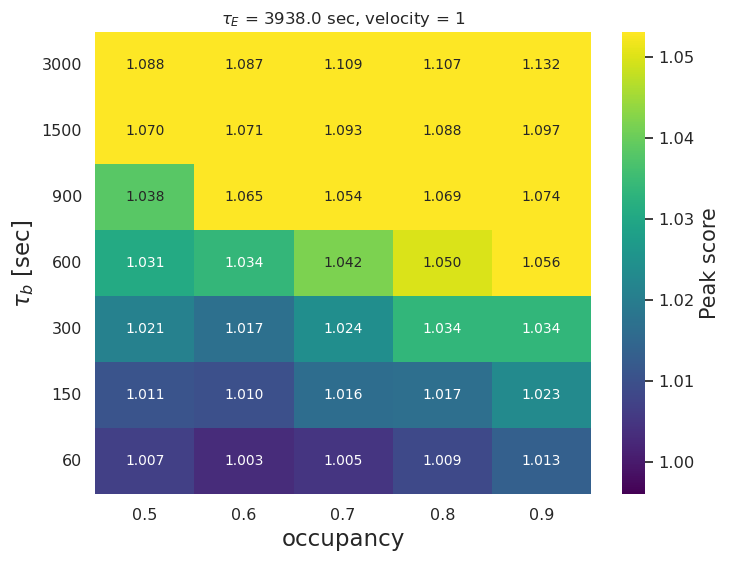

In [15]:
list_life, list_vel = [1500], [1]

numline_c = 7
numline_o = 5
occupancy_range = [0.5, 0.6, 0.7, 0.8, 0.9]
file = file[file['occupancy'].isin(occupancy_range)]
lifetime = file['life']
velocity = file['velocity']

for life in list(list_life):
    for vel in list(list_vel):
        new_file_filtered_unique = file[(lifetime == life) & (velocity == vel)][['clife', 'occupancy', 'peak_ave']]
        
        # Group by 'clife' and 'occupancy_bin', and calculate the mean of 'isoscore'
        dtaframe_grouped = new_file_filtered_unique.groupby(['clife', 'occupancy'], as_index=False).mean()
        convertor = 21.875 * 60 / 500
        dtaframe_grouped['clife'] = (dtaframe_grouped['clife'] * convertor).round()
        dtaframe_grouped = dtaframe_grouped.drop_duplicates(keep='first')
        dtaframe_grouped = dtaframe_grouped[dtaframe_grouped['clife'] > 30]
        dtaframe_grouped = dtaframe_grouped[dtaframe_grouped['clife'] <= 3000]
        heatmap_data = dtaframe_grouped.pivot('clife', 'occupancy', 'peak_ave')
        
        plt.figure(figsize=(8, 6))
        im = sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".3f", vmin=0.996, vmax=1.0531, cbar_kws={'label': 'Frip score'})
        sns.set(font_scale=0.831)
        cbar = im.collections[0].colorbar
        cbar.ax.tick_params(labelsize=11.75)
        cbar.set_label('Peak score', fontsize=15)
        
        # Add equipotential lines for loop size = 700
        smooth_scale = 1
        z = ndimage.zoom(heatmap_data.to_numpy(), smooth_scale)
       # cntr1 = im.contour(np.linspace(0, numline_o, numline_o * smooth_scale),
        #                   np.linspace(0, numline_c, numline_c * smooth_scale),
        #                   heatmap_data.to_numpy(), levels=[1.00766], colors='tomato', linestyles='dashed', alpha=1)
        
        #hansen_line, = plt.plot([], [], color='tomato', linestyle='dashed', alpha=0.83, label='Liu et al., 2020')

        # Format tick labels
        im.set_xticklabels([int(float(t.get_text())) if float(t.get_text()).is_integer() else t.get_text() for t in im.get_xticklabels()])
        im.set_yticklabels([int(float(t.get_text())) if float(t.get_text()).is_integer() else t.get_text() for t in im.get_yticklabels()])

        plt.xlabel('occupancy', fontsize=16.5)
        plt.xticks(fontsize=11.5, rotation=0)
        plt.ylabel(r'$\tau_b$ [sec]', fontsize=16.5)
        plt.yticks(fontsize=11.5, rotation=0)
        plt.title(r'$\tau_E$ = %s sec, velocity = %s' % (np.round(life * convertor), vel), fontsize=11.95)
        # Add legend
        #plt.legend(handles=[hansen_line], loc=(1.195, 0.81), fontsize=11.5)
        plt.gca().invert_yaxis()
        plt.savefig('peaksweep_for_occupancy_%s_%s.pdf'%(life, vel), transparent = True, bbox_inches = 'tight')
        plt.show()


### binding time vs occupancy with orientation

In [16]:
file = pd.read_csv('../../../data/peak_score_averaged_hsteps_coolres10_points_eq_orientation_conv.csv')
file
lifetime = file['life']
velocity = file['velocity']
clife = file['clife']
cof = file['cof']
file['occupancy']=(file['clife']/(file['clife']+file['cof'])).round(2)
unique_life = np.unique(lifetime)
unique_vel = np.unique(velocity)
unique_clife = np.unique(clife)
unique_cof = np.unique(cof)
unique_occupancy = np.unique(file['occupancy'])
file

,life,velocity,clife,cof,peak_ave,occupancy
0,1500.0,1,11.43,1.27,1.001655,0.90
1,2500.0,1,11.43,1.27,1.004163,0.90
2,3500.0,1,11.43,1.27,1.005867,0.90
3,4500.0,1,11.43,1.27,1.016884,0.90
4,500.0,1,11.43,1.27,1.002057,0.90
...,...,...,...,...,...,...
494,2500.0,1,571.43,97.96,1.150822,0.85
495,3500.0,1,571.43,97.96,1.160290,0.85
496,4500.0,1,571.43,97.96,1.194674,0.85
497,500.0,1,571.43,97.96,1.036634,0.85


In [17]:
file['clife']=file['clife']
file['cof']=file['cof']
lifetime = file['life']
velocity = file['velocity']
clife = file['clife']
cof = file['cof']
occupancy = file['occupancy']


unique_life = np.unique(lifetime)
unique_vel = np.unique(velocity)
unique_clife = np.unique(clife)
unique_cof = np.unique(cof)
unique_occup = np.unique(occupancy)
file

,life,velocity,clife,cof,peak_ave,occupancy
0,1500.0,1,11.43,1.27,1.001655,0.90
1,2500.0,1,11.43,1.27,1.004163,0.90
2,3500.0,1,11.43,1.27,1.005867,0.90
3,4500.0,1,11.43,1.27,1.016884,0.90
4,500.0,1,11.43,1.27,1.002057,0.90
...,...,...,...,...,...,...
494,2500.0,1,571.43,97.96,1.150822,0.85
495,3500.0,1,571.43,97.96,1.160290,0.85
496,4500.0,1,571.43,97.96,1.194674,0.85
497,500.0,1,571.43,97.96,1.036634,0.85


### for convergent orientation

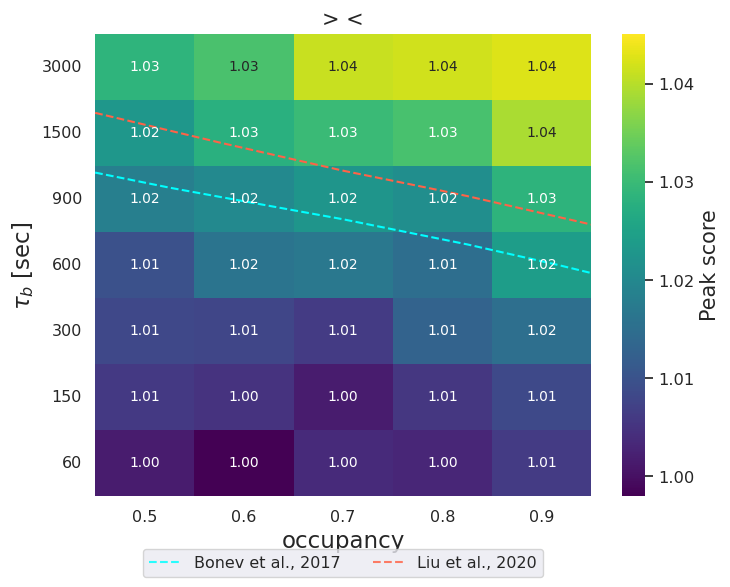

In [20]:
list_life, list_vel = [500], [1]

numline_c = 7
numline_o = 5
occupancy_range = [0.5, 0.6, 0.7, 0.8, 0.9]
file = file[file['occupancy'].isin(occupancy_range)]
lifetime = file['life']
velocity = file['velocity']
from scipy.ndimage.filters import gaussian_filter
for life in list(list_life):
    for vel in list(list_vel):
        new_file_filtered_unique = file[(lifetime == life) & (velocity == vel)][['clife', 'occupancy', 'peak_ave']]
        
        # Group by 'clife' and 'occupancy_bin', and calculate the mean of 'isoscore'
        dtaframe_grouped = new_file_filtered_unique.groupby(['clife', 'occupancy'], as_index=False).mean()
        convertor = 21.875 * 60 / 500
        dtaframe_grouped['clife'] = (dtaframe_grouped['clife'] * convertor).round()
        #dtaframe_grouped['peak_ave'] = dtaframe_grouped['peak_ave'].round(3)
        dtaframe_grouped = dtaframe_grouped.drop_duplicates(keep='first')
        dtaframe_grouped = dtaframe_grouped[dtaframe_grouped['clife'] > 30]
        dtaframe_grouped = dtaframe_grouped[dtaframe_grouped['clife'] <= 3000]
        heatmap_data = dtaframe_grouped.pivot('clife', 'occupancy', 'peak_ave')
        
        plt.figure(figsize=(8, 6))
        im = sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".2f", vmin=0.998, vmax=1.0451, cbar_kws={'label': 'Frip score'})
        sns.set(font_scale=0.831)
        cbar = im.collections[0].colorbar
        cbar.ax.tick_params(labelsize=11.75)
        cbar.set_label('Peak score', fontsize=15)
        
        # Add equipotential lines for loop size = 700
        d = gaussian_filter(heatmap_data.to_numpy(), sigma=1)
        smooth_scale = 1
        #z = ndimage.zoom(heatmap_data.to_numpy(), smooth_scale)
        cntr1 = im.contour(np.linspace(0, numline_o, numline_o * smooth_scale),
                           np.linspace(0, numline_c, numline_c * smooth_scale),
                           d, levels=[1.0198], colors='cyan', linestyles='dashed', alpha=1)
        
        bonev_line, = plt.plot([], [], color='cyan', linestyle='dashed', alpha=0.83, label='Bonev et al., 2017')
        
        cntr3 = im.contour(np.linspace(0, numline_o, numline_o * smooth_scale),
                           np.linspace(0, numline_c, numline_c * smooth_scale),
                           d, levels=[1.0241], colors='tomato', linestyles='dashed', alpha=1)
        liu_line, = plt.plot([], [], color='tomato', linestyle='dashed', alpha=0.83, label='Liu et al., 2020')
        # Format tick labels
        im.set_xticklabels([int(float(t.get_text())) if float(t.get_text()).is_integer() else t.get_text() for t in im.get_xticklabels()])
        im.set_yticklabels([int(float(t.get_text())) if float(t.get_text()).is_integer() else t.get_text() for t in im.get_yticklabels()])

        plt.xlabel('occupancy', fontsize=16.5)
        plt.xticks(fontsize=11.5, rotation=0)
        plt.ylabel(r'$\tau_b$ [sec]', fontsize=16.5)
        plt.yticks(fontsize=11.5, rotation=0)
        #plt.title(r'$\tau_E$ = %s sec, velocity = %s' % (np.round(life * convertor), vel), fontsize=11.95)
        # Add legend
        plt.title ('> <',fontsize = 15)
        plt.legend(handles=[bonev_line, liu_line], loc='upper center', bbox_to_anchor=(0.5, -0.0986), fontsize=11.5, ncol = 2)
        plt.gca().invert_yaxis()
        plt.savefig('figs/peaksweep_for_occupancy_%s_%s_conv.pdf'%(life, vel), transparent = True, bbox_inches = 'tight')
        plt.show()


### tau vs tau'

In [40]:
file = pd.read_csv('./data/peakscore_with_orientation_tau_vs_taup/peak_score_averaged_hsteps_coolres10_conv.csv')
file

,life,velocity,clife,cof,peak_ave
0,1500.0,1,1.5,0.15,1.007862
1,500.0,1,1.5,0.15,1.003999
2,1500.0,1,1.5,0.30,0.998554
3,500.0,1,1.5,0.30,0.999501
4,1500.0,1,1.5,1.00,0.997570
...,...,...,...,...,...
157,500.0,1,5000.0,3.00,1.043831
158,1500.0,1,5000.0,50.00,1.109622
159,500.0,1,5000.0,50.00,1.038324
160,1500.0,1,5000.0,500.00,1.108801


In [41]:
lifetime = file['life']
velocity = file['velocity']
clife = file['clife']
cof = file['cof']
file['peak_ave']=np.round(file['peak_ave'],3)
unique_life = np.unique(lifetime)
unique_vel = np.unique(velocity)
unique_clife = np.unique(clife)
unique_cof = np.unique(cof)

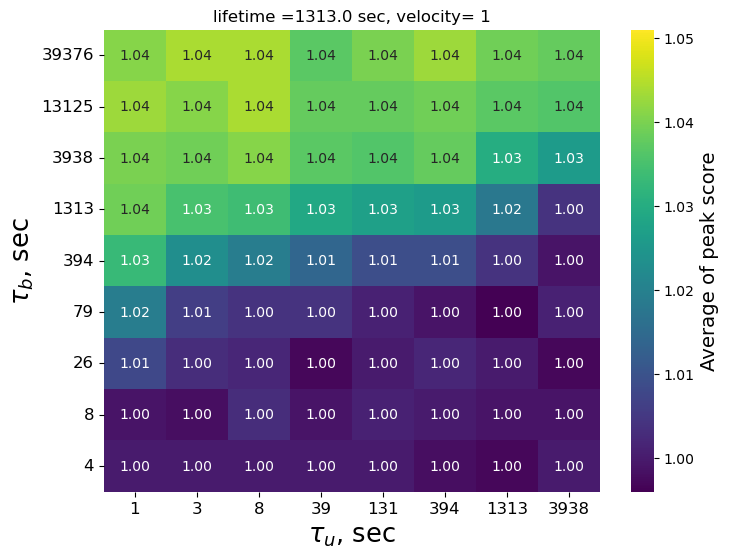

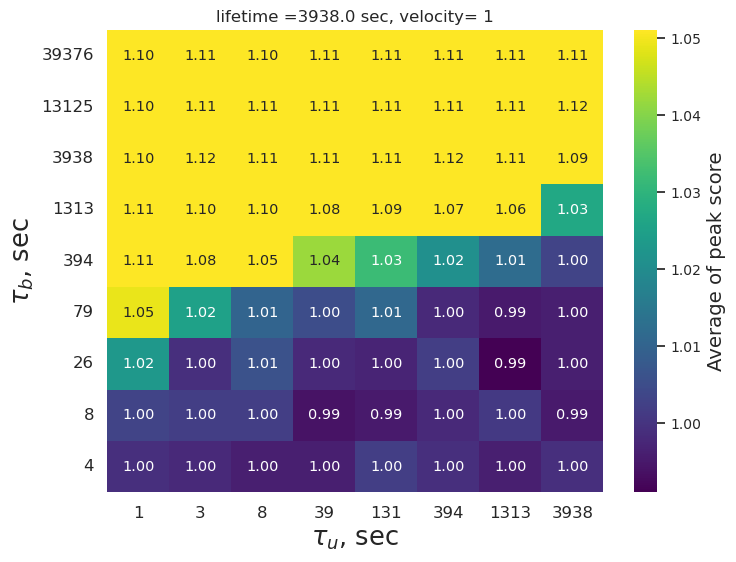

In [42]:
unique_life, unique_vel = [500, 1500],[1]

convertor = 21.8755*60/500

from scipy import ndimage

for life in list(unique_life):
    for vel in list(unique_vel):
        new_file = file[(lifetime == life)&(velocity == vel) ][['clife','cof','peak_ave']]
        new_file = new_file[new_file['cof']>0.15]
        new_file['clife']= np.round(convertor* new_file['clife'])
        new_file['cof']= np.round(convertor*new_file['cof'])
        heatmap_data = new_file.pivot('clife', 'cof', 'peak_ave')


        smooth_scale = 1
        z = ndimage.zoom(heatmap_data.to_numpy(), smooth_scale)
        
        # Create the heatmap using seaborn
        plt.figure(figsize=(8, 6))
        im = sns.heatmap(heatmap_data, annot=True, cmap='viridis', vmax = 1.051,fmt='.2f',cbar_kws={'label': 'Average of peak score'} )
        sns.set(font_scale=0.871)
        # Customize labels and title
        cbar = im.collections[0].colorbar
        cbar.ax.tick_params(labelsize=10)
        cbar.set_label('Average of peak score', fontsize=14.15) 

        im.set_xticklabels(['{:.1f}'.format(float(t.get_text())) for t in im.get_xticklabels()])
        plt.xlabel(r'$\tau_u$, sec', fontsize = 18.5)
        plt.ylabel(r'$\tau_b$, sec', fontsize =18.5)
        plt.title('lifetime =%s sec, velocity= %s'%(np.round(life*convertor), vel),fontsize = 11.95)
        im.set_xticklabels([int(float(t.get_text())) if float(t.get_text()).is_integer() else t.get_text() for t in im.get_xticklabels()])
        im.set_yticklabels([int(float(t.get_text())) if float(t.get_text()).is_integer() else t.get_text() for t in im.get_yticklabels()])
        plt.xticks(fontsize=11.95)
        plt.yticks(fontsize=11.95)
        plt.gca().invert_yaxis()
        plt.savefig('figs/sweep_peak_ave_for_%s_%s_coolres10.pdf'%(life, vel), transparent = True, bbox_inches = 'tight')
        plt.show()



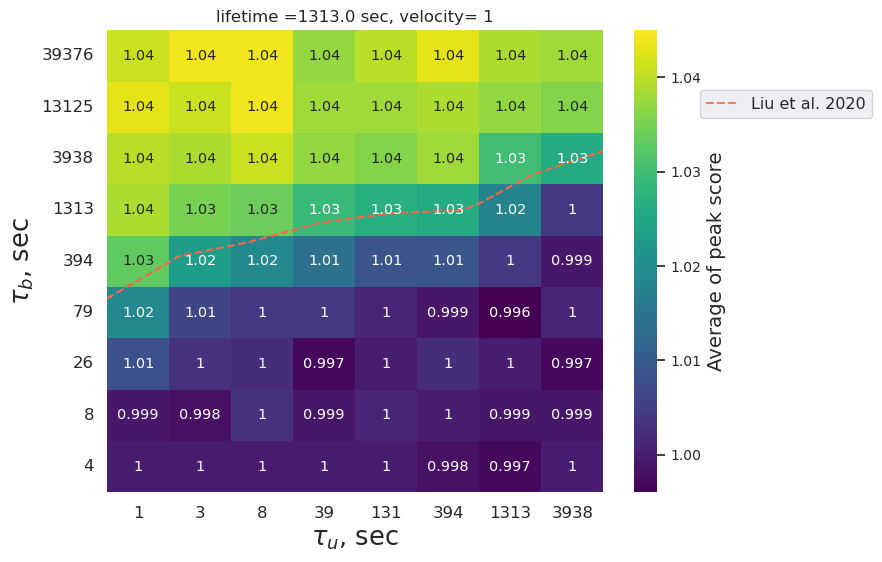

In [43]:
unique_life, unique_vel = [500],[1]

#convertor = 25*60/500

from scipy import ndimage
for life in list(unique_life):
    for vel in list(unique_vel):
        new_file = file[(lifetime == life)&(velocity == vel) ][['clife','cof','peak_ave']]
        new_file = new_file[new_file['cof']>0.15]
        new_file['clife']= np.round(convertor* new_file['clife'])
        new_file['cof']= np.round(convertor*new_file['cof'])
        heatmap_data = new_file.pivot('clife', 'cof', 'peak_ave')


        smooth_scale = 1
        z = ndimage.zoom(heatmap_data.to_numpy(), smooth_scale)
        
        # Create the heatmap using seaborn
        plt.figure(figsize=(8, 6))
        im = sns.heatmap(heatmap_data, annot=True, cmap='viridis', vmax = 1.045,fmt='.3g',cbar_kws={'label': 'Average of peak score'} )
        sns.set(font_scale=0.871)
        # Customize labels and title
        cbar = im.collections[0].colorbar
        cbar.ax.tick_params(labelsize=10)
        cbar.set_label('Average of peak score', fontsize=14.15) 



        # Add equipotential lines for loop size = 700
        cntr1 = im.contour(np.linspace(0, 8, 8*smooth_scale),
                           np.linspace(0, 9, 9*smooth_scale),
                           heatmap_data.to_numpy(), levels=[1.024], colors='tomato', linestyles='dashed', alpha=1) 


        Liu_line, = plt.plot([], [], color='tomato', linestyle='dashed', alpha=0.83, label='Liu et al. 2020')
        x_cntr1 = np.linspace(0, 8, 8*smooth_scale)
        y_cntr1 = np.interp(x_cntr1, cntr1.collections[0].get_paths()[0].vertices[:,0], 
                            cntr1.collections[0].get_paths()[0].vertices[:,1])
        
        
        
        im.set_xticklabels(['{:.1f}'.format(float(t.get_text())) for t in im.get_xticklabels()])
        plt.xlabel(r'$\tau_u$, sec', fontsize = 18.5)
        plt.ylabel(r'$\tau_b$, sec', fontsize =18.5)
        plt.title('lifetime =%s sec, velocity= %s'%(np.round(life*convertor), vel),fontsize = 11.95)
        im.set_xticklabels([int(float(t.get_text())) if float(t.get_text()).is_integer() else t.get_text() for t in im.get_xticklabels()])
        im.set_yticklabels([int(float(t.get_text())) if float(t.get_text()).is_integer() else t.get_text() for t in im.get_yticklabels()])
        plt.xticks(fontsize=11.95)
        plt.yticks(fontsize=11.95)
        plt.gca().invert_yaxis()
        plt.legend(handles=[Liu_line], loc=(1.195,0.81), fontsize =11.5)
        plt.savefig('figs/peak_ave_for_%s_%s_coolres10.pdf'%(life, vel), transparent = True, bbox_inches = 'tight')
        plt.show()



### peak score WT vs Wapl convergent

In [33]:
file = pd.read_csv('../../../data/peak_score_averaged_hsteps_coolres10_points_eq_orientation_conv.csv')
file
lifetime = file['life']
velocity = file['velocity']
clife = file['clife']
cof = file['cof']
file['occupancy']=(file['clife']/(file['clife']+file['cof'])).round(2)
unique_life = np.unique(lifetime)
unique_vel = np.unique(velocity)
unique_clife = np.unique(clife)
unique_cof = np.unique(cof)
unique_occupancy = np.unique(file['occupancy'])
file

,life,velocity,clife,cof,peak_ave,occupancy
0,1500.0,1,11.43,1.27,1.001655,0.90
1,2500.0,1,11.43,1.27,1.004163,0.90
2,3500.0,1,11.43,1.27,1.005867,0.90
3,4500.0,1,11.43,1.27,1.016884,0.90
4,500.0,1,11.43,1.27,1.002057,0.90
...,...,...,...,...,...,...
494,2500.0,1,571.43,97.96,1.150822,0.85
495,3500.0,1,571.43,97.96,1.160290,0.85
496,4500.0,1,571.43,97.96,1.194674,0.85
497,500.0,1,571.43,97.96,1.036634,0.85


In [34]:
peak_wt, peak_wapl  = file[file['life']==500], file[file['life']==1500]
peak_wt

,life,velocity,clife,cof,peak_ave,occupancy
4,500.0,1,11.43,1.27,1.002057,0.90
10,500.0,1,11.43,11.43,1.001467,0.50
16,500.0,1,11.43,2.86,1.002857,0.80
27,500.0,1,11.43,7.62,1.001563,0.60
33,500.0,1,11.43,97.96,1.002773,0.10
...,...,...,...,...,...,...
473,500.0,1,571.43,4897.96,1.006945,0.10
479,500.0,1,571.43,571.43,1.022882,0.50
485,500.0,1,571.43,63.49,1.039209,0.90
491,500.0,1,571.43,857.14,1.021728,0.40


In [35]:
common_columns = [ 'velocity', 'clife', 'cof', 'occupancy']

# Merge the datasets on the common columns
peak_wt_70 = peak_wt[peak_wt['occupancy']==0.70]
peak_wapl_70 = peak_wapl[peak_wapl['occupancy']==0.70]
merged_df = pd.merge(peak_wt_70, peak_wapl_70, on=common_columns, how='inner')
#merged_df = merged_df[(merged_df['clife'])!=3428.57]
merged_df ['clife'] = (merged_df['clife']*convertor).round()
merged_df

,life_x,velocity,clife,cof,peak_ave_x,occupancy,life_y,peak_ave_y
0,500.0,1,300.0,48.98,1.006181,0.7,1500.0,1.024329
1,500.0,1,3000.0,489.80,1.041200,0.7,1500.0,1.132228
2,500.0,1,30000.0,4897.96,1.047269,0.7,1500.0,1.127877
3,500.0,1,60.0,9.80,1.003598,0.7,1500.0,1.008674
4,500.0,1,600.0,97.96,1.016818,0.7,1500.0,1.048782
5,500.0,1,6000.0,979.59,1.042929,0.7,1500.0,1.138362
6,500.0,1,900.0,146.94,1.022487,0.7,1500.0,1.061095
7,500.0,1,9000.0,1469.39,1.047523,0.7,1500.0,1.140939
8,500.0,1,150.0,24.49,1.001662,0.7,1500.0,1.020119
9,500.0,1,1500.0,244.90,1.029971,0.7,1500.0,1.096046


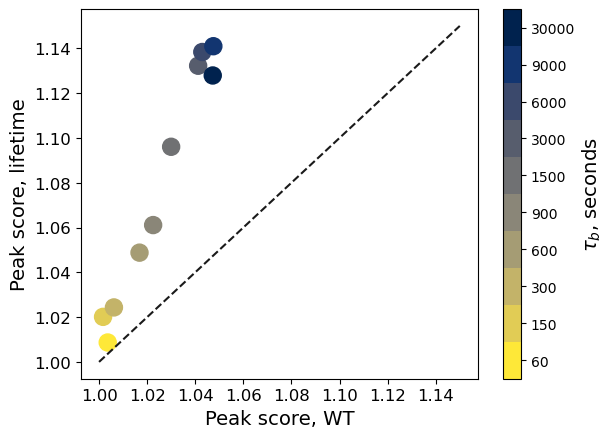

In [36]:
# Reset Seaborn's default parameters
sns.reset_defaults()


# Sort the DataFrame based on 'clife'
merged_df = merged_df.sort_values(by=['clife'])

# Number of unique points (colors) you want
num_colors = len(merged_df['clife'].unique())

# Create a discrete colormap with 'num_colors' colors
cmap = plt.cm.get_cmap('cividis_r', num_colors)

# Normalize the 'clife' values to integers (0, 1, ..., num_colors-1)
import matplotlib.colors as mcolors
norm = mcolors.BoundaryNorm(boundaries=np.arange(-0.5, num_colors), ncolors=num_colors)

# Map 'clife' values to integers for discrete coloring
clife_indices = merged_df['clife'].rank(method='dense').astype(int) - 1

# Create a scatter plot using discrete colors
sc = plt.scatter(
    merged_df['peak_ave_x'], 
    merged_df['peak_ave_y'],
    s=150, 
    c=clife_indices,  # Use mapped indices for coloring
    cmap=cmap,
    norm=norm  # Use the defined norm for correct color mapping
)

# Add a plot line
plt.plot([1, 1.15], [1, 1.15], '--k')

# Set labels
plt.xlabel('Peak score, WT', fontsize=14.15)
plt.ylabel('Peak score, lifetime', fontsize=14.15)

# Add a color bar and set its label
cbar = plt.colorbar(sc, ticks=np.arange(num_colors))
cbar.set_label(r'$\tau_b$, seconds', fontsize=14.15)
cbar.ax.set_yticklabels([f'{clife:.2f}' for clife in sorted(merged_df['clife'].unique())])
# Set integer labels for the color bar
cbar.ax.set_yticklabels([f'{int(clife)}' for clife in sorted(merged_df['clife'].unique())])


# Set font size for ticks
plt.xticks(fontsize=11.95)
plt.yticks(fontsize=11.95)

# Save the figure as a PDF file
plt.savefig('figs/peakwt_vs_peakwapl_conv.pdf', transparent=True, dpi=500)

# Display the plot
plt.show()


In [37]:
clife_list = [60.0, 900.0, 1500.0, 3000]

merged_df_sort = merged_df[merged_df['clife'].isin(clife_list)]
merged_df_sort = merged_df_sort.sort_values('clife')
merged_df_sort

,life_x,velocity,clife,cof,peak_ave_x,occupancy,life_y,peak_ave_y
3,500.0,1,60.0,9.80,1.003598,0.7,1500.0,1.008674
6,500.0,1,900.0,146.94,1.022487,0.7,1500.0,1.061095
9,500.0,1,1500.0,244.90,1.029971,0.7,1500.0,1.096046
1,500.0,1,3000.0,489.80,1.041200,0.7,1500.0,1.132228


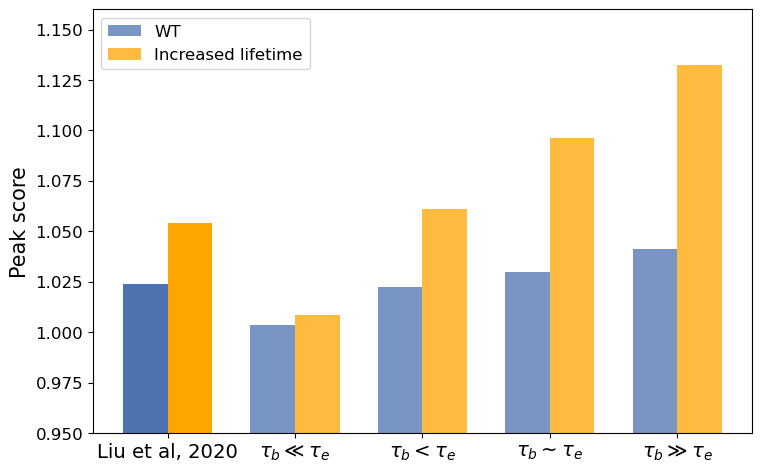

In [38]:
# Define tau_e for comparison
tau_e = 500
convertor = 21.875*60/500
# Add a new column for labels based on conditions
tau_e = tau_e*convertor
def get_label(clife, tau_e):
    if clife < 0.15 * tau_e:
        return r'$\tau_b \ll \tau_e$'
    elif 0.15 * tau_e < clife and clife < 0.75*tau_e:
        return r'$\tau_b < \tau_e$'
    elif clife > 1.5 * tau_e:
        return r'$\tau_b \gg \tau_e$'
    else:
        return r'$\tau_b \sim \tau_e$'
sns.reset_defaults()
merged_df_sort['label'] = merged_df_sort['clife'].apply(lambda x: get_label(x, tau_e))

# Plotting
fig, ax = plt.subplots(figsize=(8.5, 5.5))

# Define the bar width
bar_width = 0.35

# Plot bars for experimental data at the beginning
exp_index = 0  # Positioning them at the beginning of the plot
exp_x = 1.0241
exp_y = 1.054
bars3 = ax.bar(exp_index, exp_x, bar_width,  color='b')#WT, Liu et al, 2020 label =r'WT, Liu et al, 2021',
bars4 = ax.bar(exp_index + bar_width, exp_y, bar_width, color='orange')# label=r'Wapl 6h, Liu et al, 2021'

# Create positions for bars and plot for merged_df_sort
index = np.arange(1, len(merged_df_sort) + 1)  # Start from 1 for the subsequent data
bars1 = ax.bar(index, merged_df_sort['peak_ave_x'], bar_width, label= 'WT', color='b', alpha = 0.75) #alternative label r'$\tau_E$ =%s sec'%(500*convertor)
bars2 = ax.bar(index + bar_width, merged_df_sort['peak_ave_y'], bar_width, label= 'Increased lifetime', color='orange', alpha = 0.75) #alternative label r'$\tau_E = %s sec$'%(1500*convertor)

# Set labels and title
ax.set_ylabel('Peak score', fontsize=15)

# Adjust x-ticks to align with the bars
ax.set_xticks(np.append(exp_index + bar_width / 2, index + bar_width / 2))
ax.set_xticklabels(['Liu et al, 2020'] + list(merged_df_sort['label']), fontsize = 14.15)
#ax.set_yticklabels(fontsize = 15)
# Set y-axis limits
ax.set_ylim(0.95, 1.16)
ax.tick_params(axis='y', labelsize=12) 
# Add a legend
ax.legend(fontsize = 11.95)
plt.savefig('figs/bar_for_peak_conv.pdf', transparent = True)
# Show plot
plt.show()
